In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Supervised Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

import joblib 

In [2]:
# ============================================================================
# Step 1: Load Data and Display
# ============================================================================
print("\n" + "="*60)
print("STEP 1: LOADING DATA")
print("="*60)

Data = pd.read_csv("agri_classification.csv")
print("\n Data loaded successfully!")
print(f"Total rows: {len(Data)}")
print("\nFirst 5 rows:")
print(Data.head())



STEP 1: LOADING DATA

 Data loaded successfully!
Total rows: 1200

First 5 rows:
   Region         Season  Rainfall_mm  Temperature_C  Humidity_pct  \
0    East            Dry       120.72          29.22         55.34   
1    West  Inter-monsoon        57.34          27.82         80.55   
2   North            Dry        47.72          27.61         70.72   
3  Borneo            Dry        15.91          28.31         63.83   
4    East  Inter-monsoon       111.56          33.10         55.94   

   SoilMoisture_pct  Sunlight_hours  Soil_pH  SoilN_kg_ha  SoilP_kg_ha  \
0             25.33            7.55     6.30         60.0         13.9   
1             36.49            5.47     7.46         63.1         30.4   
2              8.49            6.02     5.84         35.9         52.5   
3             47.48            7.87     7.64         64.7         36.2   
4             33.80            6.62     5.68         36.1         22.4   

   SoilK_kg_ha RecommendedCrop  
0         60.3     

In [3]:
# ============================================================================
# Step 2: Data Information
# ============================================================================
print("\n" + "="*60)
print("STEP 2: DATASET INFORMATION")
print("="*60)
Data.info()
print("\nData types:")
print(Data.dtypes)


STEP 2: DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            1200 non-null   object 
 1   Season            1200 non-null   object 
 2   Rainfall_mm       1200 non-null   float64
 3   Temperature_C     1200 non-null   float64
 4   Humidity_pct      1200 non-null   float64
 5   SoilMoisture_pct  1200 non-null   float64
 6   Sunlight_hours    1200 non-null   float64
 7   Soil_pH           1200 non-null   float64
 8   SoilN_kg_ha       1200 non-null   float64
 9   SoilP_kg_ha       1200 non-null   float64
 10  SoilK_kg_ha       1200 non-null   float64
 11  RecommendedCrop   1200 non-null   object 
dtypes: float64(9), object(3)
memory usage: 112.6+ KB

Data types:
Region               object
Season               object
Rainfall_mm         float64
Temperature_C       float64
Humidity_pct        float64

In [4]:
# ============================================================================
# Step 3: Check Missing Values
# ============================================================================
print("\n" + "="*60)
print("STEP 3: CHECKING MISSING VALUES")
print("="*60)
print(Data.isnull().any())
print("\nMissing value counts:")
print(Data.isnull().sum())

if Data.isnull().sum().sum() == 0:
    print("No missing values found!")
else:
    print("Missing values detected!")


STEP 3: CHECKING MISSING VALUES
Region              False
Season              False
Rainfall_mm         False
Temperature_C       False
Humidity_pct        False
SoilMoisture_pct    False
Sunlight_hours      False
Soil_pH             False
SoilN_kg_ha         False
SoilP_kg_ha         False
SoilK_kg_ha         False
RecommendedCrop     False
dtype: bool

Missing value counts:
Region              0
Season              0
Rainfall_mm         0
Temperature_C       0
Humidity_pct        0
SoilMoisture_pct    0
Sunlight_hours      0
Soil_pH             0
SoilN_kg_ha         0
SoilP_kg_ha         0
SoilK_kg_ha         0
RecommendedCrop     0
dtype: int64
No missing values found!


In [5]:
# ============================================================================
# Step 4: Check Duplicates
# ============================================================================
print("\n" + "="*60)
print("STEP 4: CHECKING DUPLICATES")
print("="*60)
duplicate_count = Data.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

if duplicate_count == 0:
    print("No duplicates found!")
else:
    print(f"Found {duplicate_count} duplicates")


STEP 4: CHECKING DUPLICATES
Duplicate rows: 0
No duplicates found!


In [7]:
# ============================================================================
# Step 5: Basic Statistics
# ============================================================================
print("\n" + "="*60)
print("STEP 5: DESCRIPTIVE STATISTICS")
print("="*60)
print(Data.describe())


STEP 5: DESCRIPTIVE STATISTICS
       Rainfall_mm  Temperature_C  Humidity_pct  SoilMoisture_pct  \
count  1200.000000    1200.000000   1200.000000       1200.000000   
mean    136.972700      27.087433     73.048567         34.221483   
std      78.639914       3.084057     14.081883         13.640048   
min       0.000000      17.290000     30.000000          5.000000   
25%      73.147500      24.985000     63.175000         24.517500   
50%     122.735000      27.045000     74.245000         33.640000   
75%     191.182500      29.202500     84.240000         43.497500   
max     361.430000      36.000000    100.000000         78.650000   

       Sunlight_hours      Soil_pH  SoilN_kg_ha  SoilP_kg_ha  SoilK_kg_ha  
count     1200.000000  1200.000000  1200.000000  1200.000000  1200.000000  
mean         7.022283     6.325250    59.547333    35.068583    45.073583  
std          1.628436     0.698058    19.448149    11.708020    14.390261  
min          2.590000     4.500000     5.0


STEP 6: CROP DISTRIBUTION ANALYSIS
RecommendedCrop
Rice       493
Soybean    259
Maize      162
Chili      149
Wheat      107
Tomato      30
Name: count, dtype: int64

Total unique crops: 6


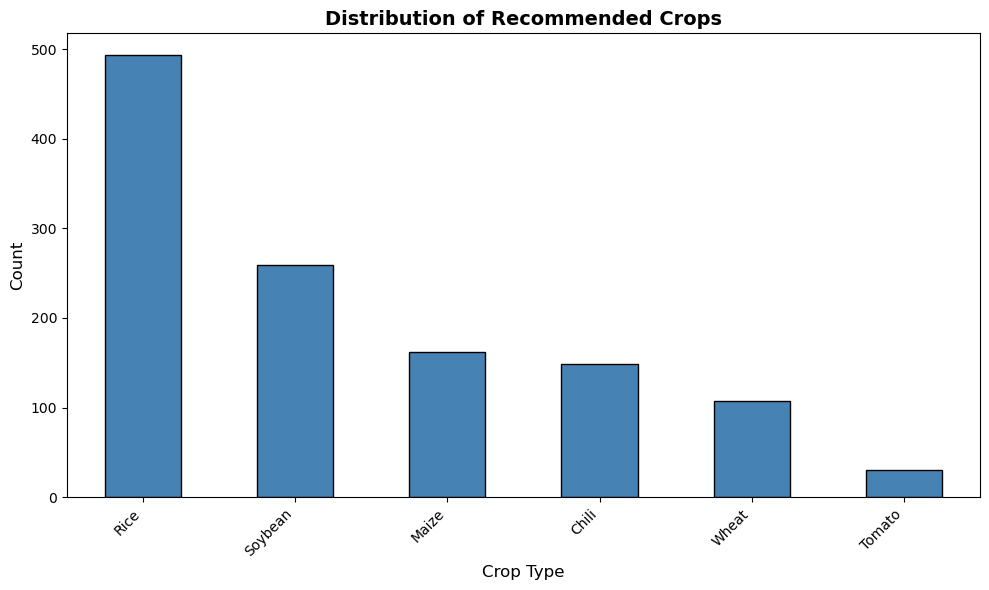

In [8]:
# ============================================================================
# Step 6: Target Variable Distribution
# ============================================================================
print("\n" + "="*60)
print("STEP 6: CROP DISTRIBUTION ANALYSIS")
print("="*60)
crop_counts = Data['RecommendedCrop'].value_counts()
print(crop_counts)
print(f"\nTotal unique crops: {Data['RecommendedCrop'].nunique()}")

# Plot crop distribution
plt.figure(figsize=(10, 6))
crop_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Distribution of Recommended Crops', fontsize=14, fontweight='bold')
plt.xlabel('Crop Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

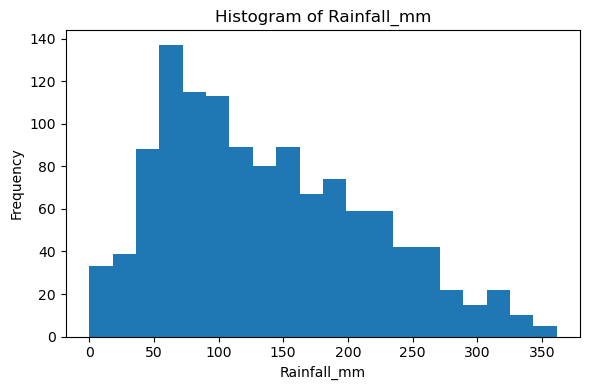

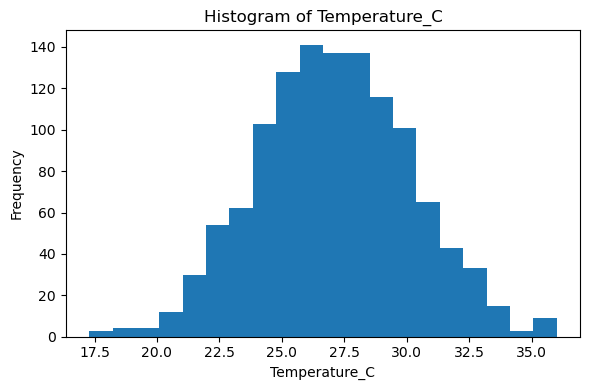

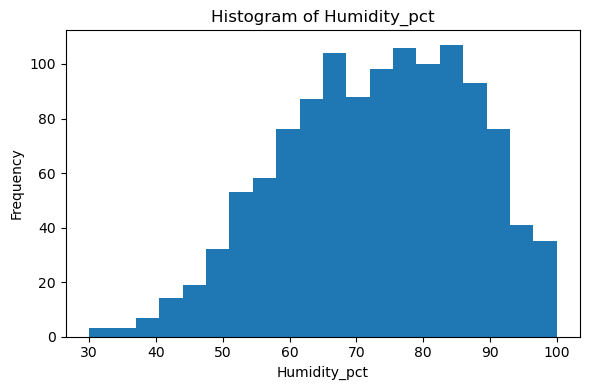

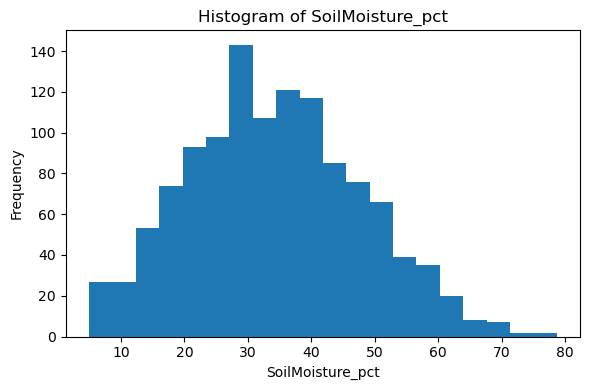

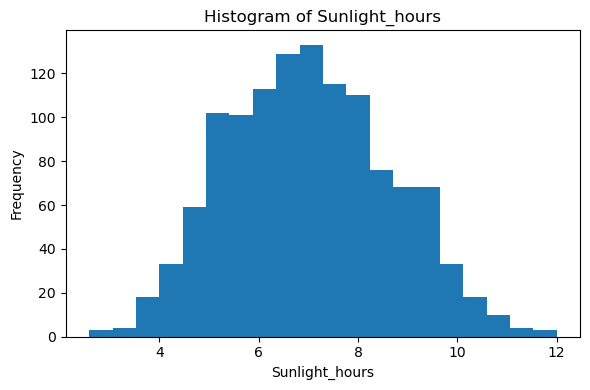

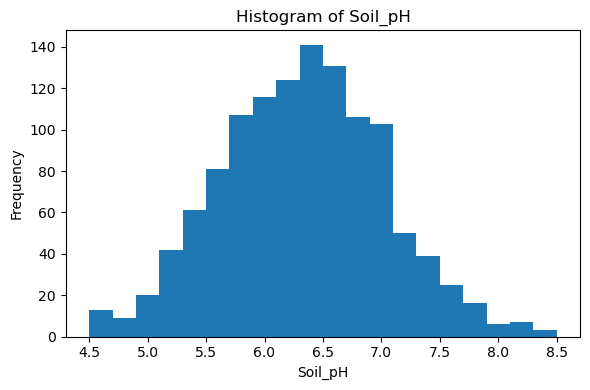

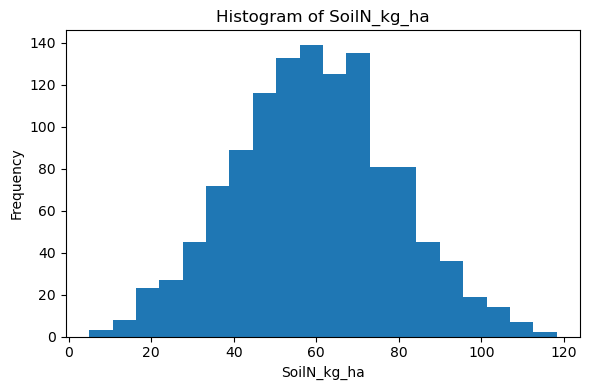

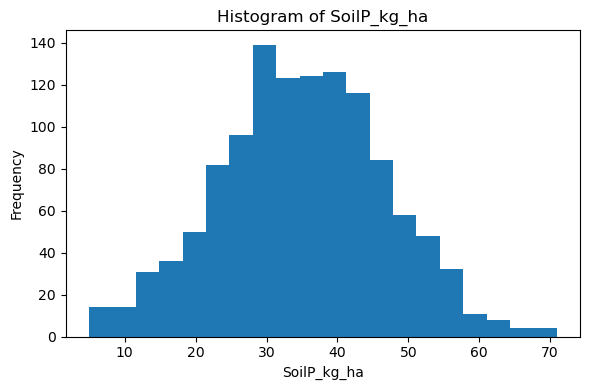

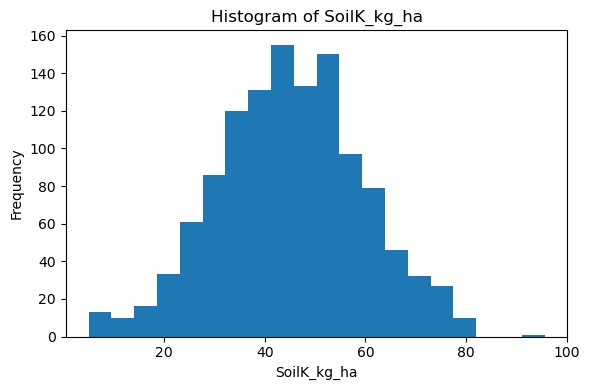

In [9]:
# Step 6.1
# ================================
# Part A – Descriptive Visualization
# ================================

df_imputed = Data

# Identify numeric columns
numeric_cols = df_imputed.select_dtypes(include=['int64', 'float64']).columns

# ----------- Histograms for numeric columns -----------
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df_imputed[col], bins=20)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()



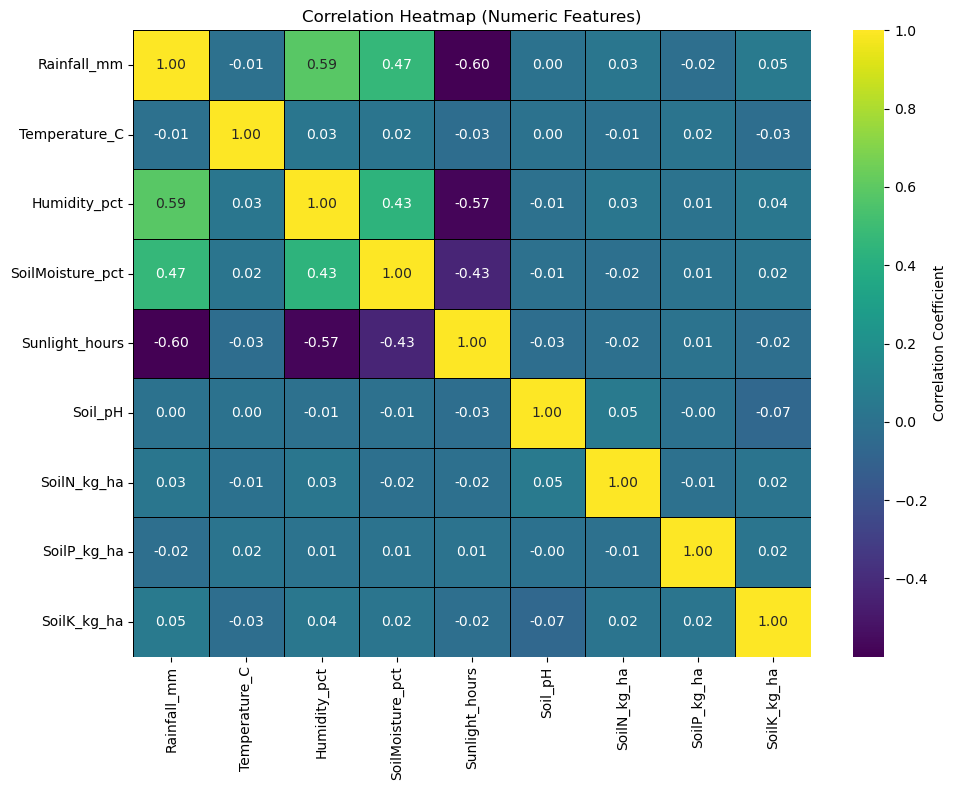

In [20]:
# ============================================================================
# Step 6.2
# ----------- Correlation Heatmap -----------

if len(numeric_cols) >= 2:
    # Calculate the Correlation Matrix
    corr = df_imputed[numeric_cols].corr()

    # Create the figure and axes
    plt.figure(figsize=(10, 8)) # Increased figure size for better visibility
    
    sns.heatmap(
        corr, 
        cmap='viridis', 
        annot=True,     # <-- This key parameter tells Seaborn to display the correlation values in each cell
        fmt=".2f",      # <-- Formats the displayed numbers to two decimal places
        linewidths=.5,  # Separates the cells for better visual clarity
        linecolor='black',
        cbar_kws={'label': 'Correlation Coefficient'} # Add label to the color bar
    )
    
    plt.title("Correlation Heatmap (Numeric Features)")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for correlation heatmap.")


In [11]:
# ============================================================================
# Step 7: Data Preprocessing
# ============================================================================
print("\n" + "="*60)
print("STEP 7: DATA PREPROCESSING")
print("="*60)

# Encode categorical variables
le_region = LabelEncoder()
le_season = LabelEncoder()
le_crop = LabelEncoder()

Data['Region_Encoded'] = le_region.fit_transform(Data['Region'])
Data['Season_Encoded'] = le_season.fit_transform(Data['Season'])
Data['Crop_Encoded'] = le_crop.fit_transform(Data['RecommendedCrop'])

print("Encoding completed!")
print("\n Encoding Mappings:")
print("\n Region Encoding:")
for i, region in enumerate(le_region.classes_):
    print(f"  {region}: {i}")

print("\nSeason Encoding:")
for i, season in enumerate(le_season.classes_):
    print(f"  {season}: {i}")

print("\nCrop Encoding:")
for i, crop in enumerate(le_crop.classes_):
    print(f"  {crop}: {i}")

print("\n Sample of encoded data:")
print(Data[['Region', 'Region_Encoded', 'Season', 'Season_Encoded', 
            'RecommendedCrop', 'Crop_Encoded']].head(10))


STEP 7: DATA PREPROCESSING
Encoding completed!

 Encoding Mappings:

 Region Encoding:
  Borneo: 0
  East: 1
  North: 2
  South: 3
  West: 4

Season Encoding:
  Dry: 0
  Inter-monsoon: 1
  Wet: 2

Crop Encoding:
  Chili: 0
  Maize: 1
  Rice: 2
  Soybean: 3
  Tomato: 4
  Wheat: 5

 Sample of encoded data:
   Region  Region_Encoded         Season  Season_Encoded RecommendedCrop  \
0    East               1            Dry               0         Soybean   
1    West               4  Inter-monsoon               1            Rice   
2   North               2            Dry               0           Chili   
3  Borneo               0            Dry               0            Rice   
4    East               1  Inter-monsoon               1           Maize   
5   North               2  Inter-monsoon               1         Soybean   
6   South               3            Dry               0         Soybean   
7   North               2            Wet               2            Rice   
8    West

In [12]:
# ============================================================================
# Step 8: Data Splitting
# ============================================================================
print("\n" + "="*60)
print("STEP 8: DATA SPLITTING")
print("="*60)

# CORRECT: Drop original + encoded crop column
X = Data.drop(['Region', 'Season', 'RecommendedCrop', 'Crop_Encoded'], axis=1) // all input columns
y = Data['Crop_Encoded'] // all output columns

# IMPORTANT: Save feature column names for GUI
feature_columns = X.columns.tolist()

print("Feature columns in order:")
for i, col in enumerate(feature_columns, 1):
    print(f"  {i}. {col}")

print(f"\n Total features: {len(feature_columns)}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y  # Added stratify
)

print("\n Data Split Summary:")
print(f"  Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(Data)*100:.1f}%)")
print(f"  Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(Data)*100:.1f}%)")
print(f"  Features: {X_train.shape[1]}")

# Scale features for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n Feature scaling completed!")


STEP 8: DATA SPLITTING
Feature columns in order:
  1. Rainfall_mm
  2. Temperature_C
  3. Humidity_pct
  4. SoilMoisture_pct
  5. Sunlight_hours
  6. Soil_pH
  7. SoilN_kg_ha
  8. SoilP_kg_ha
  9. SoilK_kg_ha
  10. Region_Encoded
  11. Season_Encoded

 Total features: 11

 Data Split Summary:
  Training set: 960 samples (80.0%)
  Testing set: 240 samples (20.0%)
  Features: 11

 Feature scaling completed!


In [13]:
# ============================================================================
# Step 9: Model 1 - Random Forest Classifier
# ============================================================================
print("\n" + "="*60)
print("STEP 9: TRAINING RANDOM FOREST MODEL")
print("="*60)

# Create and train model
rf_model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42,
    max_depth=15,  # Prevent overfitting
    min_samples_split=5,
    min_samples_leaf=2
)

print("Training Random Forest...")
rf_model.fit(X_train, y_train)
print(" Training completed!")

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
cm_rf = confusion_matrix(y_test, y_pred_rf)
cr_rf = classification_report(y_test, y_pred_rf, target_names=le_crop.classes_, zero_division=0)

print("\n Confusion Matrix (Random Forest):")
print(cm_rf)

print("\n Classification Report (Random Forest):")
print(cr_rf)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"\n Random Forest Results:")
print(f"   Accuracy: {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")
print(f"   F1-Score: {f1_rf:.4f}")

# Feature Importance
print("\n📊 Top 10 Important Features:")
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.head(10).to_string(index=False))



STEP 9: TRAINING RANDOM FOREST MODEL
Training Random Forest...
 Training completed!

 Confusion Matrix (Random Forest):
[[22  0  2  2  0  4]
 [ 3 13  3 12  0  1]
 [ 3  2 90  4  0  0]
 [ 1  3 10 36  0  2]
 [ 1  2  0  1  0  2]
 [ 1  1  4  1  0 14]]

 Classification Report (Random Forest):
              precision    recall  f1-score   support

       Chili       0.71      0.73      0.72        30
       Maize       0.62      0.41      0.49        32
        Rice       0.83      0.91      0.87        99
     Soybean       0.64      0.69      0.67        52
      Tomato       0.00      0.00      0.00         6
       Wheat       0.61      0.67      0.64        21

    accuracy                           0.73       240
   macro avg       0.57      0.57      0.56       240
weighted avg       0.70      0.73      0.71       240


 Random Forest Results:
   Accuracy: 0.7292 (72.92%)
   F1-Score: 0.7127

📊 Top 10 Important Features:
         Feature  Importance
     Rainfall_mm    0.266382
   Tem

In [14]:
# ============================================================================
# Step 10: Model 2 - Logistic Regression
# ============================================================================
print("\n" + "="*60)
print("STEP 10: TRAINING LOGISTIC REGRESSION MODEL")
print("="*60)

# Create and train model
lr_model = LogisticRegression(
    max_iter=1000, 
    random_state=42,
    multi_class='multinomial',  # Better for multi-class
    solver='lbfgs'
)

print("Training Logistic Regression...")
lr_model.fit(X_train_scaled, y_train)
print(" Training completed!")

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate
cm_lr = confusion_matrix(y_test, y_pred_lr)
cr_lr = classification_report(y_test, y_pred_lr, target_names=le_crop.classes_, zero_division=0)

print("\n Confusion Matrix (Logistic Regression):")
print(cm_lr)

print("\n Classification Report (Logistic Regression):")
print(cr_lr)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print(f"\n Logistic Regression Results:")
print(f"   Accuracy: {accuracy_lr:.4f} ({accuracy_lr*100:.2f}%)")
print(f"   F1-Score: {f1_lr:.4f}")




STEP 10: TRAINING LOGISTIC REGRESSION MODEL
Training Logistic Regression...
 Training completed!

 Confusion Matrix (Logistic Regression):
[[19  2  1  5  0  3]
 [ 6 12  5  8  0  1]
 [ 7  2 85  5  0  0]
 [ 0  3 18 29  0  2]
 [ 1  4  0  1  0  0]
 [ 4  3  1  8  0  5]]

 Classification Report (Logistic Regression):
              precision    recall  f1-score   support

       Chili       0.51      0.63      0.57        30
       Maize       0.46      0.38      0.41        32
        Rice       0.77      0.86      0.81        99
     Soybean       0.52      0.56      0.54        52
      Tomato       0.00      0.00      0.00         6
       Wheat       0.45      0.24      0.31        21

    accuracy                           0.62       240
   macro avg       0.45      0.44      0.44       240
weighted avg       0.60      0.62      0.61       240


 Logistic Regression Results:
   Accuracy: 0.6250 (62.50%)
   F1-Score: 0.6053


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [15]:
# ============================================================================
# Step 11: Model 3 - Support Vector Machine
# ============================================================================
print("\n" + "="*60)
print("STEP 11: TRAINING SVM MODEL")
print("="*60)

# Create and train model
svm_model = SVC(
    kernel='rbf', 
    random_state=42,
    C=10,  # Tuned parameter
    gamma='scale',
    probability=True  # Enable probability estimates
)

print("Training SVM (this may take a while)...")
svm_model.fit(X_train_scaled, y_train)
print(" Training completed!")

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate
cm_svm = confusion_matrix(y_test, y_pred_svm)
cr_svm = classification_report(y_test, y_pred_svm, target_names=le_crop.classes_, zero_division=0)

print("\n Confusion Matrix (SVM):")
print(cm_svm)

print("\n Classification Report (SVM):")
print(cr_svm)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f"\n SVM Results:")
print(f"   Accuracy: {accuracy_svm:.4f} ({accuracy_svm*100:.2f}%)")
print(f"   F1-Score: {f1_svm:.4f}")


STEP 11: TRAINING SVM MODEL
Training SVM (this may take a while)...
 Training completed!

 Confusion Matrix (SVM):
[[21  0  5  3  0  1]
 [ 3 17  3  9  0  0]
 [ 6  5 82  5  0  1]
 [ 2  8  9 30  0  3]
 [ 1  3  0  1  0  1]
 [ 3  2  3  4  0  9]]

 Classification Report (SVM):
              precision    recall  f1-score   support

       Chili       0.58      0.70      0.64        30
       Maize       0.49      0.53      0.51        32
        Rice       0.80      0.83      0.82        99
     Soybean       0.58      0.58      0.58        52
      Tomato       0.00      0.00      0.00         6
       Wheat       0.60      0.43      0.50        21

    accuracy                           0.66       240
   macro avg       0.51      0.51      0.51       240
weighted avg       0.65      0.66      0.65       240


 SVM Results:
   Accuracy: 0.6625 (66.25%)
   F1-Score: 0.6525



STEP 12: MODEL COMPARISON

📊 Model Performance Comparison:
              Model  Accuracy  F1-Score
      Random Forest  0.729167  0.712670
                SVM  0.662500  0.652524
Logistic Regression  0.625000  0.605296

 BEST MODEL: Random Forest
   Accuracy: 0.7292 (72.92%)


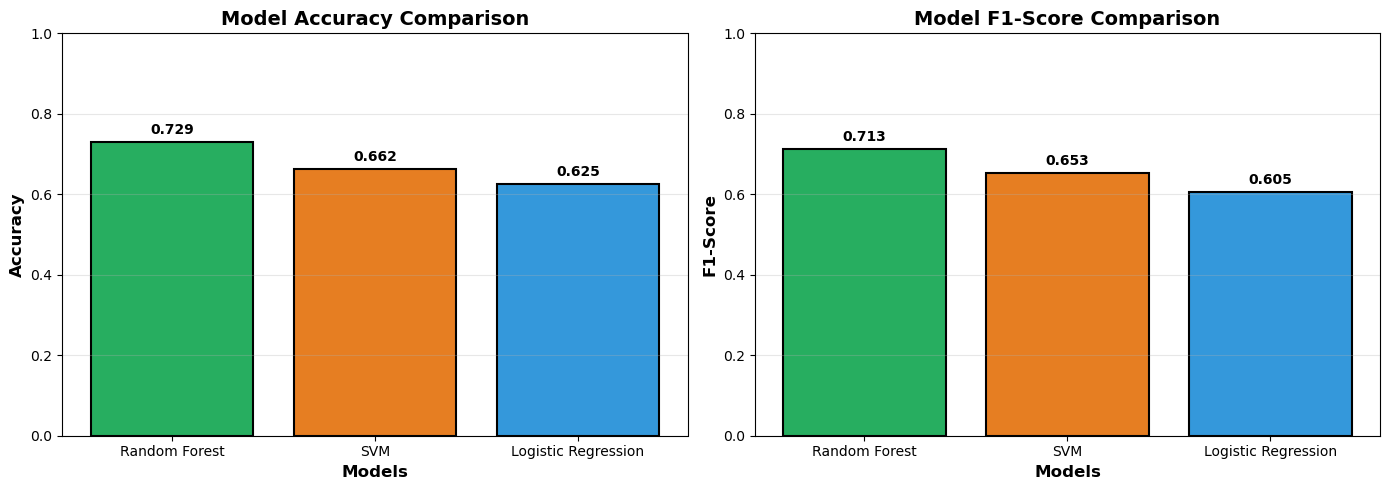

In [16]:
# ============================================================================
# Step 12: Model Comparison
# ============================================================================
print("\n" + "="*60)
print("STEP 12: MODEL COMPARISON")
print("="*60)

# Create comparison dictionary
comparison_data = {
    'Model': ['Random Forest', 'Logistic Regression', 'SVM'],
    'Accuracy': [accuracy_rf, accuracy_lr, accuracy_svm],
    'F1-Score': [f1_rf, f1_lr, f1_svm]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

print("\n📊 Model Performance Comparison:")
print(comparison_df.to_string(index=False))

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
best_accuracy = comparison_df.iloc[0]['Accuracy']

print(f"\n BEST MODEL: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
axes[0].bar(comparison_df['Model'], comparison_df['Accuracy'], 
            color=['#27AE60', '#E67E22', '#3498DB'], edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Models', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylim(0, 1)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (model, acc) in enumerate(zip(comparison_df['Model'], comparison_df['Accuracy'])):
    axes[0].text(i, acc + 0.02, f'{acc:.3f}', ha='center', fontweight='bold')

# F1-Score comparison
axes[1].bar(comparison_df['Model'], comparison_df['F1-Score'], 
            color=['#27AE60', '#E67E22', '#3498DB'], edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('Models', fontsize=12, fontweight='bold')
axes[1].set_ylabel('F1-Score', fontsize=12, fontweight='bold')
axes[1].set_title('Model F1-Score Comparison', fontsize=14, fontweight='bold')
axes[1].set_ylim(0, 1)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (model, f1) in enumerate(zip(comparison_df['Model'], comparison_df['F1-Score'])):
    axes[1].text(i, f1 + 0.02, f'{f1:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


STEP 13: BEST MODEL ANALYSIS (Random Forest)

 Detailed Classification Report:
              precision    recall  f1-score   support

       Chili       0.71      0.73      0.72        30
       Maize       0.62      0.41      0.49        32
        Rice       0.83      0.91      0.87        99
     Soybean       0.64      0.69      0.67        52
      Tomato       0.00      0.00      0.00         6
       Wheat       0.61      0.67      0.64        21

    accuracy                           0.73       240
   macro avg       0.57      0.57      0.56       240
weighted avg       0.70      0.73      0.71       240



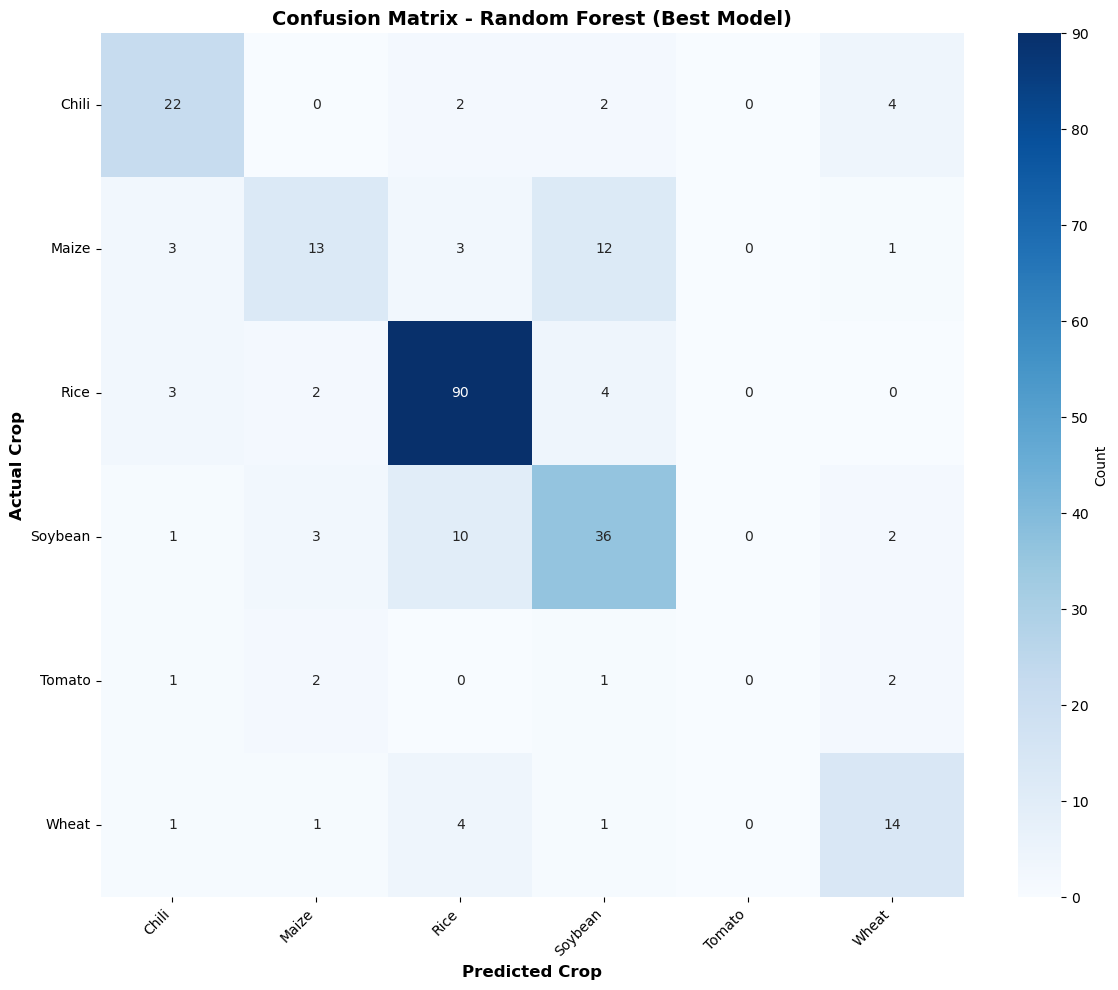


 Per-Class Performance:
  Chili       : 0.733 (73.3%)
  Maize       : 0.406 (40.6%)
  Rice        : 0.909 (90.9%)
  Soybean     : 0.692 (69.2%)
  Tomato      : 0.000 (0.0%)
  Wheat       : 0.667 (66.7%)


In [17]:
# ============================================================================
# Step 13: Best Model - Detailed Analysis
# ============================================================================
print("\n" + "="*60)
print(f"STEP 13: BEST MODEL ANALYSIS ({best_model_name})")
print("="*60)

# Use Random Forest (best model) predictions for detailed analysis
print("\n Detailed Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le_crop.classes_, zero_division=0))

# Confusion Matrix Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_crop.classes_, 
            yticklabels=le_crop.classes_,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Random Forest (Best Model)', fontsize=14, fontweight='bold')
plt.ylabel('Actual Crop', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Crop', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Per-class accuracy analysis
print("\n Per-Class Performance:")
for i, crop in enumerate(le_crop.classes_):
    mask = y_test == i
    if mask.sum() > 0:
        class_accuracy = (y_pred_rf[mask] == i).sum() / mask.sum()
        print(f"  {crop:12s}: {class_accuracy:.3f} ({class_accuracy*100:.1f}%)")



In [18]:
# ============================================================================
# Step 14: Save the Best Model + Required Files
# ============================================================================
print("\n" + "="*60)
print("STEP 14: SAVING MODEL AND ENCODERS")
print("="*60)

# Save all required files
joblib.dump(rf_model, 'best_crop_model.pkl')
joblib.dump(le_region, 'region_encoder.pkl')
joblib.dump(le_season, 'season_encoder.pkl')
joblib.dump(le_crop, 'crop_encoder.pkl')
joblib.dump(feature_columns, 'feature_columns.pkl')  # CRITICAL: Save feature names

print("\n All files saved successfully!")
print("\n Saved Files:")
print("  1. best_crop_model.pkl         - Random Forest model")
print("  2. region_encoder.pkl          - Region label encoder")
print("  3. season_encoder.pkl          - Season label encoder")
print("  4. crop_encoder.pkl            - Crop label encoder")
print("  6. feature_columns.pkl         - Feature column names (IMPORTANT!)")

# Verify saved files
print("\n🔍 Verifying saved files...")
try:
    test_model = joblib.load('best_crop_model.pkl')
    test_features = joblib.load('feature_columns.pkl')
    print(f" Model loaded successfully! Feature count: {len(test_features)}")
    print(f" Feature names: {test_features}")
except Exception as e:
    print(f" Error loading model: {e}")


STEP 14: SAVING MODEL AND ENCODERS

 All files saved successfully!

 Saved Files:
  1. best_crop_model.pkl         - Random Forest model
  2. region_encoder.pkl          - Region label encoder
  3. season_encoder.pkl          - Season label encoder
  4. crop_encoder.pkl            - Crop label encoder
  6. feature_columns.pkl         - Feature column names (IMPORTANT!)

🔍 Verifying saved files...
 Model loaded successfully! Feature count: 11
 Feature names: ['Rainfall_mm', 'Temperature_C', 'Humidity_pct', 'SoilMoisture_pct', 'Sunlight_hours', 'Soil_pH', 'SoilN_kg_ha', 'SoilP_kg_ha', 'SoilK_kg_ha', 'Region_Encoded', 'Season_Encoded']


In [19]:
# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "="*60)
print("🎉 TRAINING COMPLETED SUCCESSFULLY!")
print("="*60)
print(f"\n Final Model Performance:")
print(f"   Best Model: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"   Total Crops: {len(le_crop.classes_)}")
print(f"   Total Samples: {len(Data)}")
print(f"   Training Samples: {len(X_train)}")
print(f"   Testing Samples: {len(X_test)}")

print(f"\n Ready for GUI Application!")
print(f"   Run 'app.py' to start the crop recommendation system.")

print("\n" + "="*60)
print("SMART AGRICULTURE SYSTEM READY!")
print("="*60 + "\n")


🎉 TRAINING COMPLETED SUCCESSFULLY!

 Final Model Performance:
   Best Model: Random Forest
   Accuracy: 0.7292 (72.92%)
   Total Crops: 6
   Total Samples: 1200
   Training Samples: 960
   Testing Samples: 240

 Ready for GUI Application!
   Run 'app.py' to start the crop recommendation system.

SMART AGRICULTURE SYSTEM READY!

